In [5]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Import the CSV file as pd dataframe

In [2]:
df = pd.read_csv('C:/Users/Areta/Documents/Data Science/mlproject/notebook/data/stud.csv')
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables
In this project, we will predict the math score;
- Thus, math score is the dependant features (Y).
- The rest are indipendent features (X)

In [9]:
X = df.drop('math_score', axis=1)
X.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [14]:
y = df.math_score
y.head(5)

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

### Encode the cat features and Scale the num features

In [11]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', OneHotEncoder(), cat_features),
        ('StandardScaler', StandardScaler(), num_features)
    ]
)

In [12]:
X = preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [13]:
X.shape

(1000, 19)

### Separate dataset into train and test

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model training

In [27]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list= []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # trainmodel

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set")
    print("- Root Mean Squared Error: {:.3f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.3f}".format(model_train_mae))
    print("- R2 Score: {:.3f}".format(model_train_r2))

    print("------------------------------------")

    print("Model performance for test set")
    print("- Root Mean Squared Error: {:.3f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.3f}".format(model_test_mae))
    print("- R2 Score: {:.3f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")

Linear Regression
Model performance for training set
- Root Mean Squared Error: 5.273
- Mean Absolute Error: 4.228
- R2 Score: 0.883
------------------------------------
Model performance for test set
- Root Mean Squared Error: 5.565
- Mean Absolute Error: 4.365
- R2 Score: 0.845


Lasso
Model performance for training set
- Root Mean Squared Error: 6.478
- Mean Absolute Error: 5.130
- R2 Score: 0.823
------------------------------------
Model performance for test set
- Root Mean Squared Error: 6.343
- Mean Absolute Error: 4.952
- R2 Score: 0.799


Ridge
Model performance for training set
- Root Mean Squared Error: 5.269
- Mean Absolute Error: 4.216
- R2 Score: 0.883
------------------------------------
Model performance for test set
- Root Mean Squared Error: 5.577
- Mean Absolute Error: 4.377
- R2 Score: 0.845


K-Neighbors Regressor
Model performance for training set
- Root Mean Squared Error: 5.852
- Mean Absolute Error: 4.650
- R2 Score: 0.855
------------------------------------
M

### Results

In [32]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.845171
2,Ridge,0.844507
7,CatBoosting Regressor,0.827956
8,AdaBoost Regressor,0.811472
1,Lasso,0.798910
5,Random Forest,0.793732
6,XGBRegressor,0.765524
3,K-Neighbors Regressor,0.747412
4,Decision Tree,0.623091


Insights:
- An R-Squared value shows how well the model predicts the outcome of the dependent variable. R-Squared values range from 0 to 1. An R-Squared value of 0 means that the model explains or predicts 0% of the relationship between the dependent and independent variables.
- The highest R2 score is the one giving the closest prediction, thus we choose Linear Regression.

### Linear Regression

In [33]:
lr = LinearRegression(fit_intercept=True)
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 84.52


### Plot y_pred and y_test

Text(0, 0.5, 'Prediction')

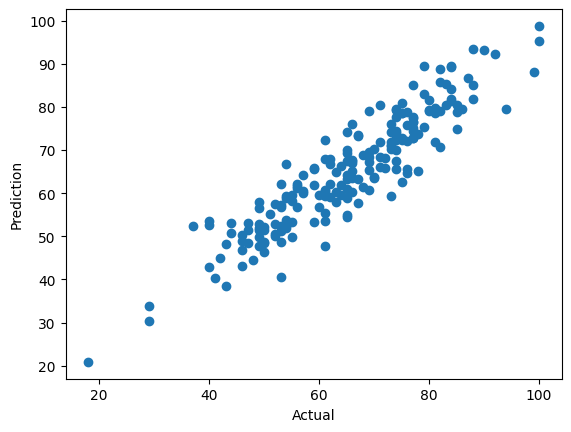

In [35]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual')
plt.ylabel('Prediction')

<Axes: xlabel='math_score'>

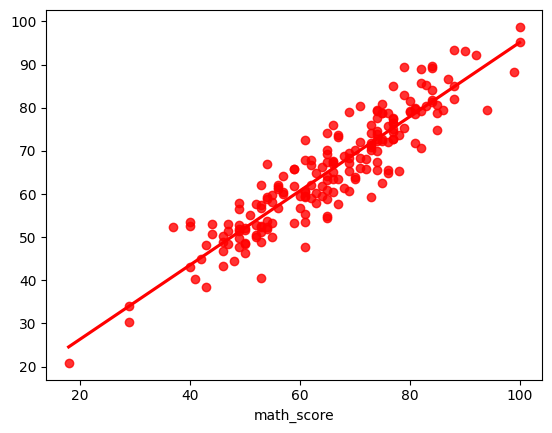

In [36]:
sns.regplot(x=y_test, y=y_pred,ci=None,color='r')

### Difference between Actual and Predicted Values

In [37]:
pred_vs_actual_df=pd.DataFrame({'Actual_Value':y_test, "Predicted_Value":y_pred, "Difference":y_test-y_pred})
pred_vs_actual_df

,Actual_Value,Predicted_Value,Difference
632,66,67.031250,-1.031250
687,77,77.312500,-0.312500
833,77,76.546875,0.453125
182,50,46.437500,3.562500
831,74,72.390625,1.609375
...,...,...,...
258,70,70.203125,-0.203125
118,51,55.093750,-4.093750
279,73,59.390625,13.609375
458,100,95.296875,4.703125
